In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fastparquet, pyarrow
import mne
from mne.decoding import Scaler
from utils import *

In [7]:
mne.set_log_level('WARNING')

In [2]:
df = pd.read_csv('by_patient.csv')

In [3]:
other = activity_df(df, 'Other', 'expert_consensus')
seizure = activity_df(df, 'Seizure', 'expert_consensus')
gpd = activity_df(df, 'GPD', 'expert_consensus')
lpd = activity_df(df, 'LPD', 'expert_consensus')
grda = activity_df(df, 'GRDA', 'expert_consensus')
lrda = activity_df(df, 'LRDA', 'expert_consensus')

In [4]:
i_vals = [i for i in range(df.shape[0])]

In [8]:
random_index = np.random.choice(i_vals, size = 1, replace = False)[0]
raw = load_preprocess(df, random_index, 0.5, 90, bandpass = False, notch = False, reref = False)

In [9]:
help(mne.io.RawArray.set_eeg_reference)

Help on function set_eeg_reference in module mne.channels.channels:

set_eeg_reference(self, ref_channels='average', projection=False, ch_type='auto', forward=None, *, joint=False, verbose=None)
    Specify which reference to use for EEG data.
    
    Use this function to explicitly specify the desired reference for EEG.
    This can be either an existing electrode or a new virtual channel.
    This function will re-reference the data according to the desired
    reference.
    
    Parameters
    ----------
    
    ref_channels : list of str | str
        Can be:
    
        - The name(s) of the channel(s) used to construct the reference.
        - ``'average'`` to apply an average reference (default)
        - ``'REST'`` to use the Reference Electrode Standardization Technique
          infinity reference :footcite:`Yao2001`.
        - An empty list, in which case MNE will not attempt any re-referencing of
          the data
    
    projection : bool
        If ``ref_channels='av

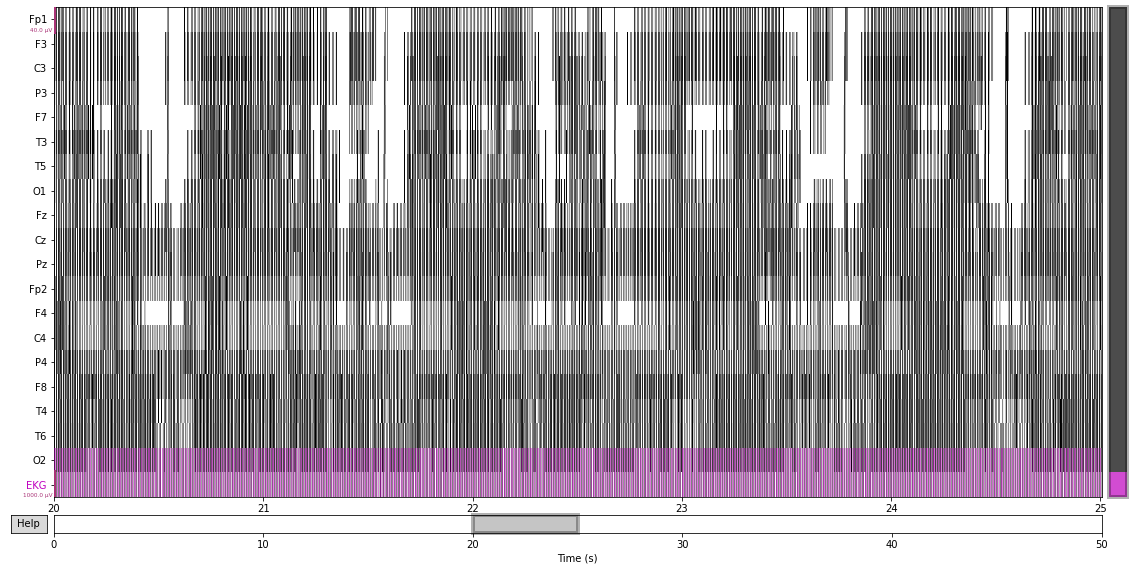

In [11]:
raw.plot(start = 20, duration = 5)
plt.show()

In [12]:
eeg = pd.DataFrame(raw.get_data(), index = raw.ch_names).transpose()

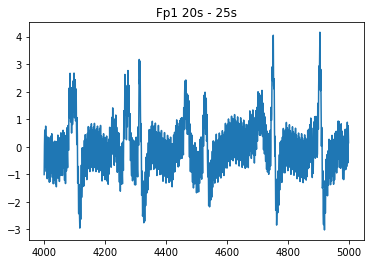

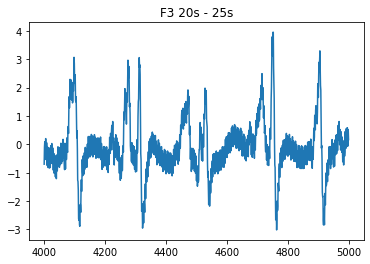

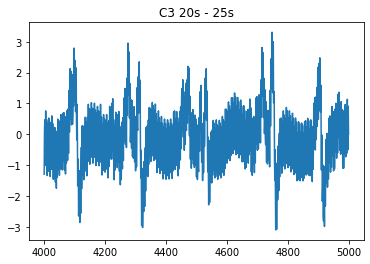

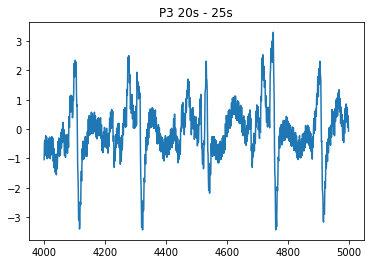

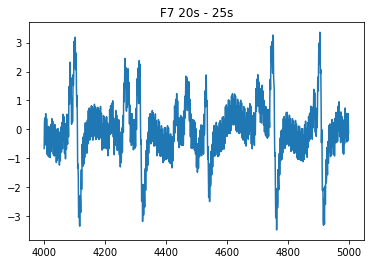

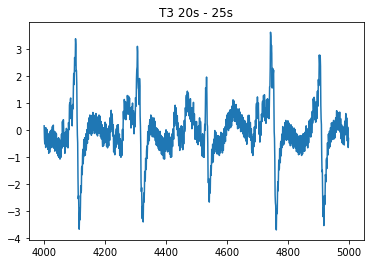

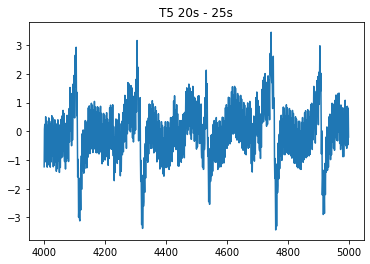

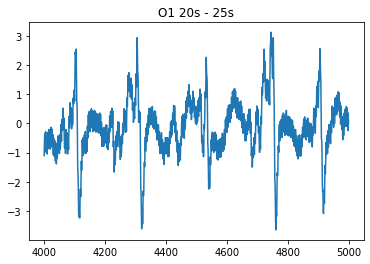

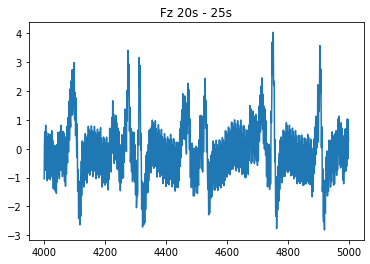

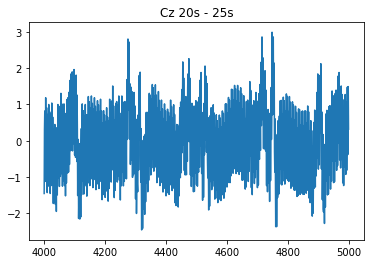

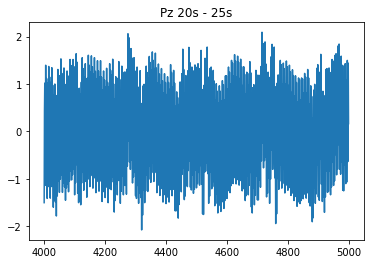

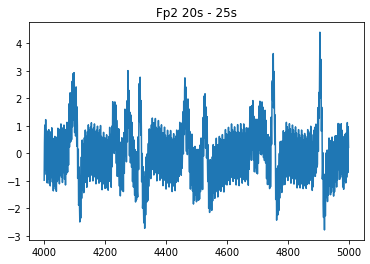

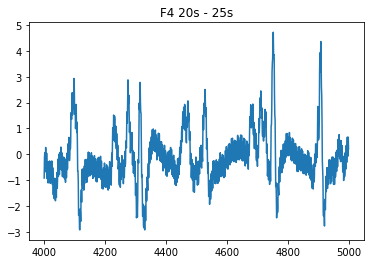

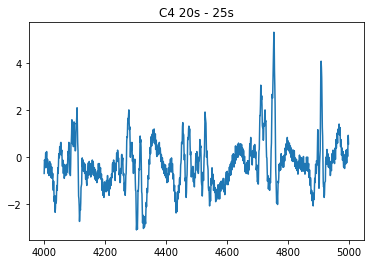

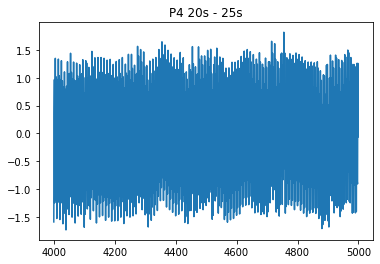

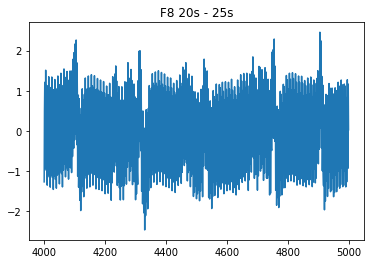

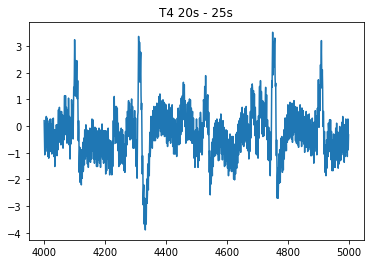

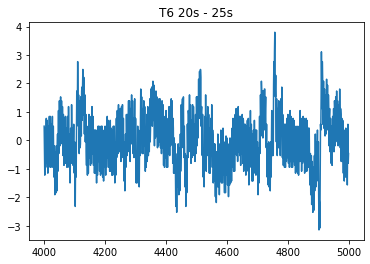

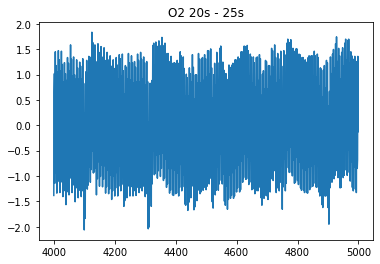

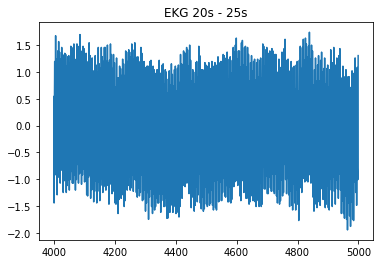

In [14]:
for col in eeg.columns:
    plt.plot(eeg[col][4000:5000])
    plt.title('{} 20s - 25s'.format(col))
    plt.show()

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


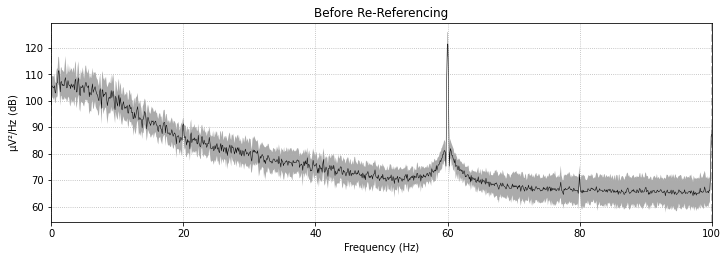

In [15]:
raw.plot_psd(average = True, picks = 'eeg')
plt.title('Before Re-Referencing')
plt.show()

In [16]:
raw.set_eeg_reference(ref_channels = ['Fp1', 'Fp2', 'O1', 'O2'], ch_type = 'eeg')

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,22 points
Good channels,"19 EEG, 1 ECG"
Bad channels,None
EOG channels,Not available
ECG channels,EKG
Sampling frequency,200.00 Hz
Highpass,0.00 Hz
Lowpass,100.00 Hz


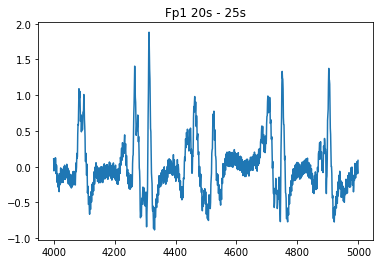

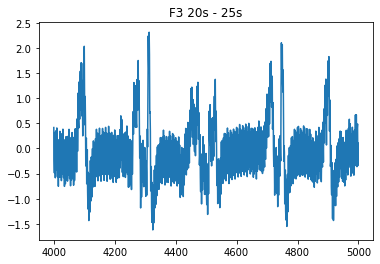

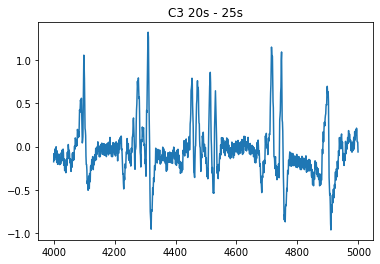

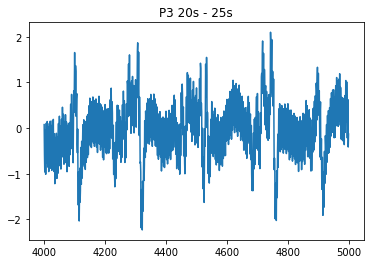

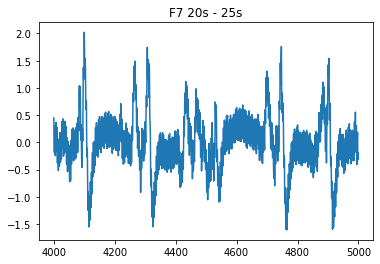

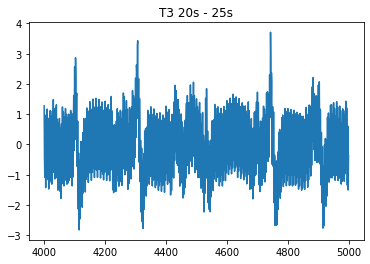

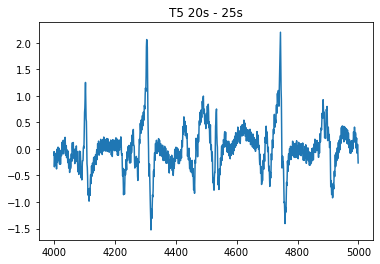

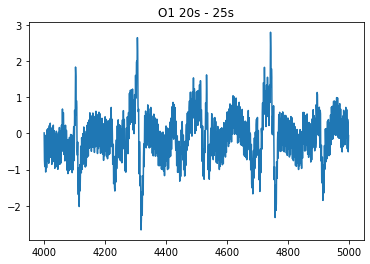

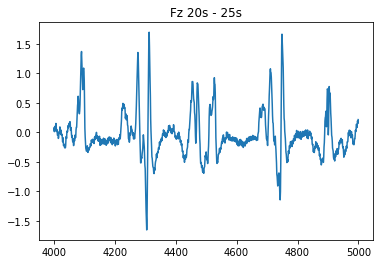

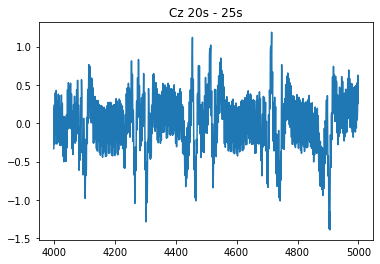

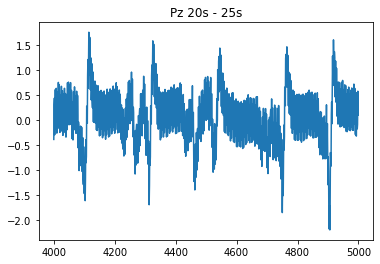

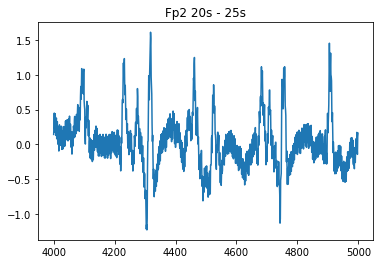

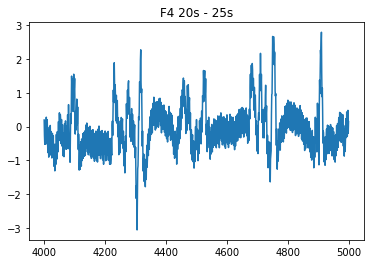

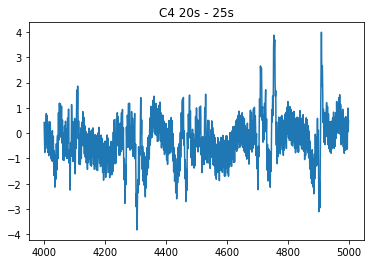

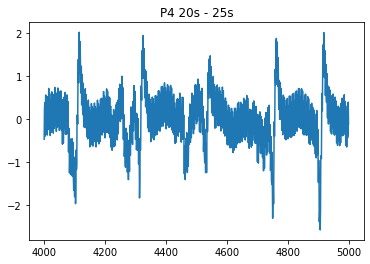

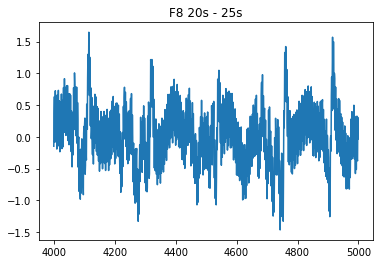

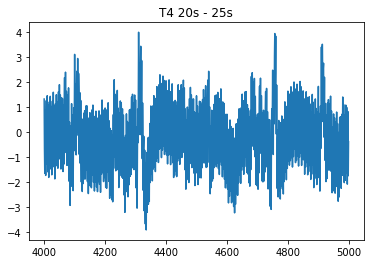

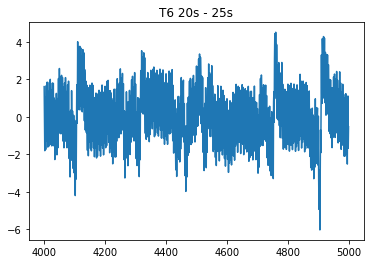

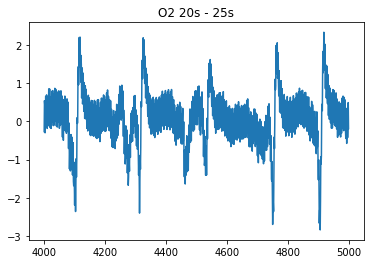

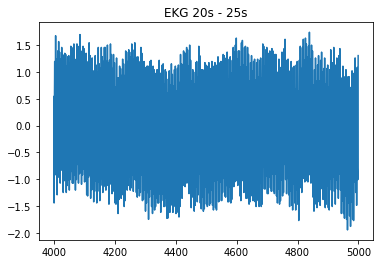

In [17]:
eeg = pd.DataFrame(raw.get_data(), index = raw.ch_names).transpose()
for col in eeg.columns:
    plt.plot(eeg[col][4000:5000])
    plt.title('{} 20s - 25s'.format(col))
    plt.show()

/home/clay/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


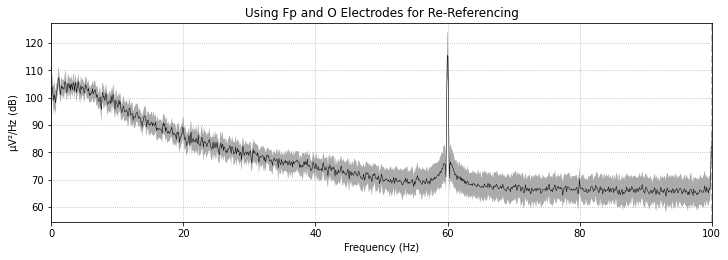

In [19]:
raw.plot_psd(average = True, picks = 'eeg')
plt.title('Using Fp and O Electrodes for Re-Referencing')
plt.show()